In [4]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import numpy as np
import os
import glob

## Read the input

In [6]:
# Sinle Binner results
sb = pd.read_csv('input/SB_stats2.csv', sep=' ', header=None)
sb['sample'] = sb[0].str.split('/').str[0]
sb['binner'] = sb[0].str.split('/').str[1]
sb = sb.rename(columns={1: "bins_number"})
sb = sb.drop(columns=[0])
sb1 = sb.pivot(index="sample", columns="binner", values="bins_number").reset_index()
#sb1.to_excel('results/SinleBinner_bins_stats2.xlsx', index=False)
sb1 = sb1.drop(columns=['dastool'])

print('Samples number is ', sb1.shape[0])
sb1.head()

Samples number is  1818


binner,sample,maxbin,metabat,vamb
0,V00H9L,116.0,0.0,214.0
1,V010T4,183.0,180.0,159.0
2,V03HFT,91.0,0.0,210.0
3,V03ZU2,114.0,0.0,198.0
4,V045JG,108.0,0.0,274.0


In [8]:
sb1.to_csv('results/SinleBinner_bins_stats2.csv', index=False)

In [9]:
# bin to cluster (8,302 lines)
cdb = pd.read_csv('../2023_Clusters/input/Cdb.csv')
cdb['sample'] = cdb['genome'].str.split('_').str[0]
#print('Clusters number is ', len(cdb['sample'].unique()))

dt = cdb['sample'].value_counts()
dt = dt.to_frame().reset_index()
dt = dt.rename(columns={'index': 'sample', 'sample': 'dastool'})

print('Samples with MultiBinning results number is ', dt.shape[0])
dt.head()

Samples with MultiBinning results number is  142


,sample,dastool
0,VM14J6,127
1,VY8V5H,113
2,VOHZH4,109
3,VE8VBP,96
4,VIJ2FQ,93


In [11]:
sb2 = pd.merge(sb1, dt, on='sample', how='outer').sort_values(by='dastool', ascending=False)
#sb2.to_excel('results/SingleBinner_bins_stats.xlsx', index=False)

print('Samples number is ', sb2.shape[0])
sb2.head()

Samples number is  1881


,sample,maxbin,metabat,vamb,dastool
1089,VM14J6,435.0,312.0,497.0,127.0
1818,VY8V5H,NaN,NaN,NaN,113.0
1819,VOHZH4,NaN,NaN,NaN,109.0
710,VE8VBP,271.0,259.0,401.0,96.0
1820,VIJ2FQ,NaN,NaN,NaN,93.0


In [13]:
cnt = pd.read_csv('input/ContigsRNumbStats_BGI.csv')
cnt.head()

,name,reads_numb,nameS,total_bp,maxCL_bp,avgCL_bp,N50,contigs
0,lab20_V3276M_E100013465_L01,109810982,V3276M,407116049,673015,1611,6301,252608
1,lab20_V32MIP_E100009727_L01,102273989,V32MIP,667657595,578836,1861,9188,358581
2,lab20_V40FOF_E100009887_L01,108961838,V40FOF,348325866,558300,1938,9345,179713
3,lab20_V412BS_E100013104_L01,110272626,V412BS,372025453,759057,2052,11345,181279
4,lab20_V4L9I1_E100013465_L01,110242066,V4L9I1,671961649,759178,1699,6621,395324


In [15]:
cnt = pd.read_csv('input/ContigsRNumbStats_BGI.csv')
cnt1 = cnt[['name', 'reads_numb', 'nameS','contigs', 'avgCL_bp','maxCL_bp','N50','total_bp']]
cnt1 = cnt1.rename(columns={'name': "file_name", 'reads_numb': "reads_number", 'nameS': "sample", 'contigs': "contigs_number"})

sb3 = pd.merge(sb2, cnt1, on='sample', how='left').sort_values(by='dastool', ascending=False)

print('Samples number is ', sb3.shape[0])
sb3 = sb3[['file_name','sample', 'reads_number', 'contigs_number', 'metabat', 'maxbin', 'vamb', 'dastool', 'avgCL_bp','maxCL_bp','N50','total_bp']]
#sb3.to_excel('results/SingleBinner_bins_stats.xlsx', index=False)
sb3.head()

Samples number is  1881


,file_name,sample,reads_number,contigs_number,metabat,maxbin,vamb,dastool,avgCL_bp,maxCL_bp,N50,total_bp
0,lab70_VM14J6_E100009727_L01,VM14J6,110022601.0,678252.0,312.0,435.0,497.0,127.0,1462.0,705925.0,4023.0,9.917826e+08
1,lab20_VY8V5H_E100013135_L01,VY8V5H,107390427.0,686759.0,NaN,NaN,NaN,113.0,1458.0,796652.0,4125.0,1.001760e+09
2,lab20_VOHZH4_E100013189_L01,VOHZH4,110488049.0,533975.0,NaN,NaN,NaN,109.0,1458.0,688962.0,4422.0,7.790405e+08
3,lab64_VE8VBP_E100013128_L01,VE8VBP,92503390.0,500408.0,259.0,271.0,401.0,96.0,1634.0,1383150.0,5900.0,8.176772e+08
4,lab20_VIJ2FQ_E100010235_L01,VIJ2FQ,110050103.0,564355.0,NaN,NaN,NaN,93.0,1510.0,675888.0,4384.0,8.525162e+08


## Vizualization

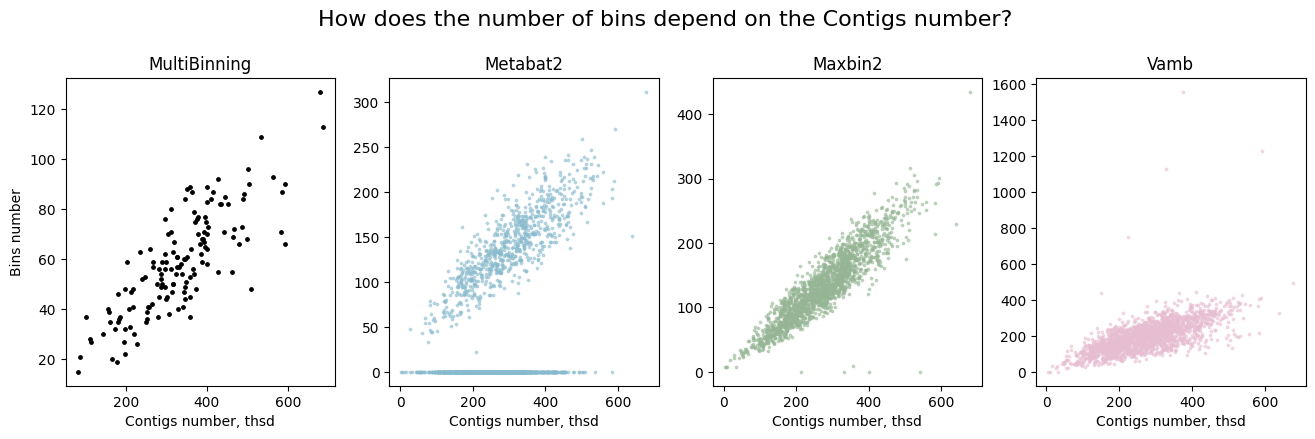

In [16]:
## Bins Number vs Contigs Number

plt.figure(figsize=(16, 4))
plt.suptitle('How does the number of bins depend on the Contigs number?', fontsize=16, y=1.05)

plt.subplot(1, 4, 1)
plt.scatter(sb3['contigs_number']/1000, sb3['dastool'], label='dastool',  s=6, c='black') #c='#F0BEA6'
plt.xlabel('Contigs number, thsd')
plt.ylabel('Bins number')
plt.title('MultiBinning')

plt.subplot(1, 4, 2)
plt.scatter(sb3['contigs_number']/1000, sb3['metabat'], label='metabat', alpha=0.5, s=3, c='#88BACD')
plt.xlabel('Contigs number, thsd')
plt.title('Metabat2')

plt.subplot(1, 4, 3)
plt.scatter(sb3['contigs_number']/1000, sb3['maxbin'], label='maxbin', alpha=0.5, s=3, c='#95B594')
plt.xlabel('Contigs number, thsd')
plt.title('Maxbin2')

plt.subplot(1, 4, 4)
plt.scatter(sb3['contigs_number']/1000, sb3['vamb'], label='vamb', alpha=0.5, s=3, c='#E7BDD1')
plt.xlabel('Contigs number, thsd')
plt.title('Vamb')

plt.savefig('results/SingleBinner_bins_vs_Contigs.png', dpi=300, bbox_inches='tight')
plt.savefig('results/SingleBinner_bins_vs_Contigs.svg', bbox_inches='tight')


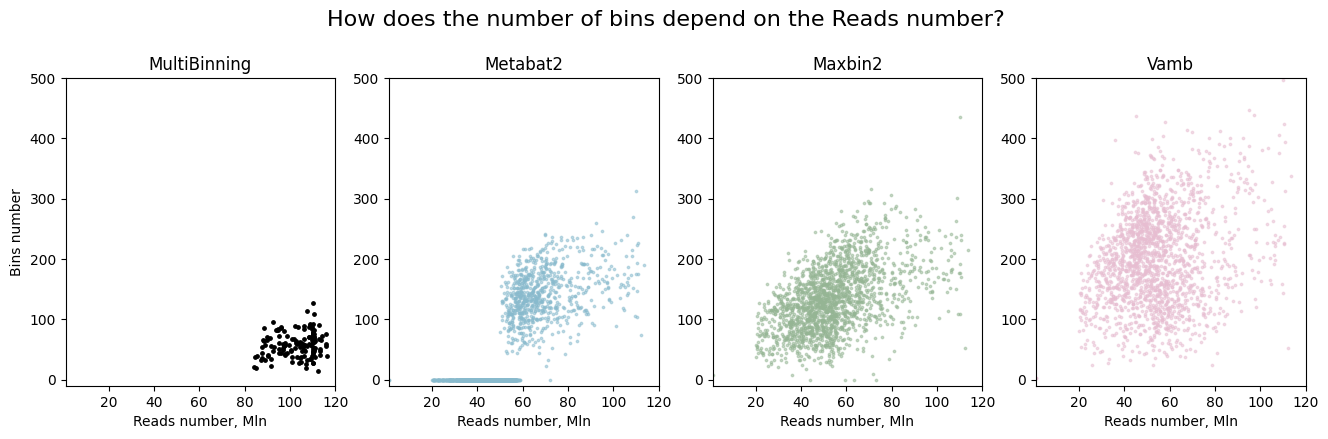

In [17]:
## Reads Number vs Contigs Number

plt.figure(figsize=(16, 4))
plt.suptitle('How does the number of bins depend on the Reads number?', fontsize=16, y=1.05)

plt.subplot(1, 4, 1)
plt.scatter(sb3['reads_number']/1000000, sb3['dastool'], label='dastool',  s=6, c='black') #c='#F0BEA6'
plt.xlabel('Reads number, Mln')
plt.ylabel('Bins number')
plt.title('MultiBinning')
plt.ylim(-10, 500)
plt.xlim(1,120)

plt.subplot(1, 4, 2)
plt.scatter(sb3['reads_number']/1000000, sb3['metabat'], label='metabat', alpha=0.5, s=3, c='#88BACD')
plt.xlabel('Reads number, Mln')
plt.title('Metabat2')
plt.ylim(-10, 500)
plt.xlim(1,120)

plt.subplot(1, 4, 3)
plt.scatter(sb3['reads_number']/1000000, sb3['maxbin'], label='maxbin', alpha=0.5, s=3, c='#95B594')
plt.xlabel('Reads number, Mln')
plt.title('Maxbin2')
plt.ylim(-10, 500)
plt.xlim(1,120)

plt.subplot(1, 4, 4)
plt.scatter(sb3['reads_number']/1000000, sb3['vamb'], label='vamb', alpha=0.5, s=3, c='#E7BDD1')
plt.xlabel('Reads number, Mln')
plt.title('Vamb')
plt.ylim(-10, 500)
plt.xlim(1,120)

plt.savefig('results/SingleBinner_bins_vs_Reads.png', dpi=300, bbox_inches='tight')
plt.savefig('results/SingleBinner_bins_vs_Reads.svg', bbox_inches='tight')


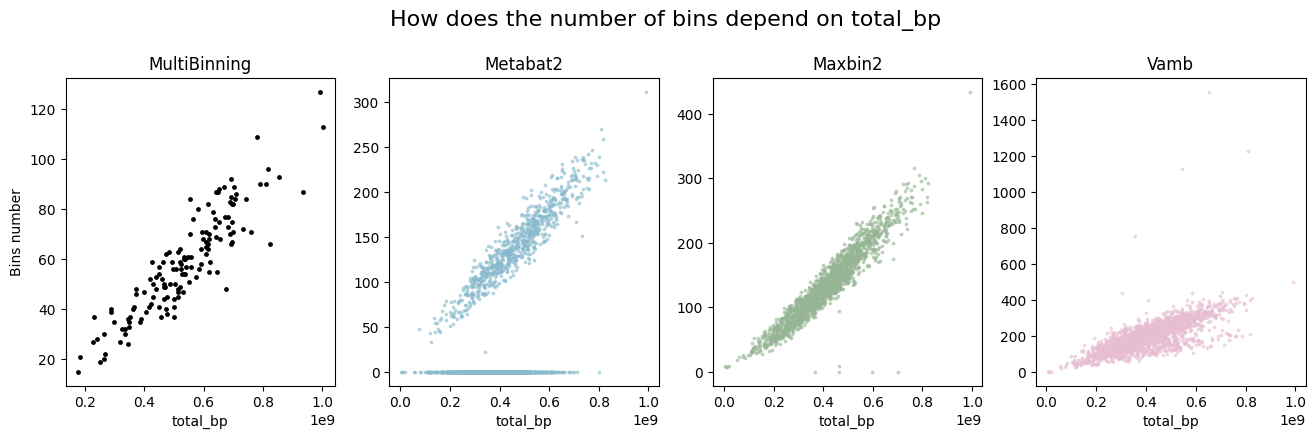

In [34]:
## Reads Number vs Contigs Number

#val = 'N50'
#val = 'avgCL_bp'
#val = 'maxCL_bp'
val = 'total_bp'

plt.figure(figsize=(16, 4))
plt.suptitle('How does the number of bins depend on '+str(val), fontsize=16, y=1.05)
#plt.suptitle('How does the number of bins depend on the total length of the assembled contigs?', fontsize=16, y=1.05)

plt.subplot(1, 4, 1)
plt.scatter(sb3[val], sb3['dastool'],  s=6, c='black') #c='#F0BEA6'
plt.xlabel(val)
plt.ylabel('Bins number')
plt.title('MultiBinning')

plt.subplot(1, 4, 2)
plt.scatter(sb3[val], sb3['metabat'], label='metabat', alpha=0.5, s=3, c='#88BACD')
plt.xlabel(val)
plt.title('Metabat2')

plt.subplot(1, 4, 3)
plt.scatter(sb3[val], sb3['maxbin'], label='maxbin', alpha=0.5, s=3, c='#95B594')
plt.xlabel(val)
plt.title('Maxbin2')

plt.subplot(1, 4, 4)
plt.scatter(sb3[val], sb3['vamb'], label='vamb', alpha=0.5, s=3, c='#E7BDD1')
plt.xlabel(val)
plt.title('Vamb')

plt.savefig('results/SingleBinner_bins_vs_'+str(val)+'.png', dpi=300, bbox_inches='tight')
plt.savefig('results/SingleBinner_bins_vs_Reads'+str(val)+'.svg', bbox_inches='tight')

## Correlation matrix

In [20]:
sb4 = sb3.replace(0, np.nan)

In [26]:
corD = sb3[['reads_number', 'contigs_number', 'dastool', 'avgCL_bp', 'maxCL_bp', 'N50', 'total_bp']].corr()
corMb = sb3[['reads_number', 'contigs_number', 'metabat','avgCL_bp', 'maxCL_bp', 'N50', 'total_bp']].corr()
corMx = sb3[['reads_number', 'contigs_number', 'maxbin',  'avgCL_bp', 'maxCL_bp', 'N50', 'total_bp']].corr()
corV = sb3[['reads_number', 'contigs_number', 'vamb', 'avgCL_bp', 'maxCL_bp', 'N50', 'total_bp']].corr()

cor = sb4[['reads_number', 'contigs_number', 'dastool', 'metabat', 'maxbin', 'vamb', 'avgCL_bp', 'maxCL_bp', 'N50', 'total_bp']].corr()
cor

sns.clustermap(cor)

#sns.clustermap(corD, method="complete", cmap='RdBu', annot=True,
               #annot_kws={"size": 9}, vmin=-1, vmax=1, figsize=(9,9))

#plt.savefig('results/SingleBinner_correlation.png', dpi=300, bbox_inches='tight')
#plt.savefig('results/SingleBinner_correlation.svg', bbox_inches='tight')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/matrix.py:68: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  mask = np.zeros(data.shape, np.bool)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations